In [1]:
import pandas as pd
import os



mkdir: ../metadata/summary: File exists


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
figure_folder = '/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures'

figure1_folder = f'{figure_folder}/Fig1/plates'
figure2_folder = f'{figure_folder}/Fig2/plates'

print(f'figure1_folder: "{figure1_folder}"')
print(f'figure2_folder: "{figure2_folder}"')

! mkdir -p "$figure1_folder"
! mkdir -p "$figure2_folder"

figure1_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/Fig1/plates"
figure2_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/Fig2/plates"


In [7]:
folder = os.path.join(metadata_folder, 'number_of_cells_reads_genes/')

In [8]:
ls $folder

Aorta_cell_numbers.csv
Aorta_nreads_ngenes.csv
Bladder_cell_numbers.csv
Bladder_nreads_ngenes.csv
Brain_(Microglia)_cell_numbers.csv
Brain_(Microglia)_nreads_ngenes.csv
Brain_(Non-microglia)_cell_numbers.csv
Brain_(Non-microglia)_nreads_ngenes.csv
Brain_Microglia_cell_numbers.csv
Brain_Microglia_nreads_ngenes.csv
Brain_Neurons_cell_numbers.csv
Brain_Neurons_nreads_ngenes.csv
Colon_cell_numbers.csv
Colon_nreads_ngenes.csv
Diaphragm_cell_numbers.csv
Diaphragm_nreads_ngenes.csv
Fat_cell_numbers.csv
Fat_nreads_ngenes.csv
Heart_cell_numbers.csv
Heart_nreads_ngenes.csv
Kidney_cell_numbers.csv
Kidney_nreads_ngenes.csv
Liver_cell_numbers.csv
Liver_nreads_ngenes.csv
Lung_cell_numbers.csv
Lung_nreads_ngenes.csv
Mammary_cell_numbers.csv
Mammary_nreads_ngenes.csv
Marrow_cell_numbers.csv
Marrow_nreads_ngenes.csv
Muscle_cell_numbers.csv
Muscle_nreads_ngenes.csv
Pancreas_cell_numbers.csv
Pancreas_nreads_ngenes.csv
Skin_cell_numbers.csv
Skin_nreads_ngenes.csv
Spleen_cell_numbers.csv
Spleen_nreads_ngen

In [9]:
import hermione as hm

In [10]:
! head $folder/Aorta*

==> ../metadata/number_of_cells_reads_genes//Aorta_cell_numbers.csv <==
"","Aorta"
"n_genes",19721
"n_cells_pass_qc",364
"n_cells_sequenced",1113

==> ../metadata/number_of_cells_reads_genes//Aorta_nreads_ngenes.csv <==
"","nGene","nReads","orig.ident"
"A21.MAA000594.3_8_M.1.1",3850,1848089,"Heart"
"F8.MAA000594.3_8_M.1.1",788,55689,"Heart"
"H11.MAA000594.3_8_M.1.1",554,318135,"Heart"
"A22.MAA000594.3_8_M.1.1",1279,270173,"Heart"
"H12.MAA000594.3_8_M.1.1",946,278892,"Heart"
"L9.MAA000594.3_8_M.1.1",798,196845,"Heart"
"P17.MAA000594.3_8_M.1.1",3531,818237,"Heart"
"D6.MAA000594.3_8_M.1.1",584,246067,"Heart"
"F14.MAA000594.3_8_M.1.1",1085,50291,"Heart"


In [11]:
import glob
import os 

globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(50791, 4)
22


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [12]:
import numpy as np

In [13]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])

In [14]:
colors = pd.read_csv(os.path.join(metadata_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta              #1f77b4
Bladder            #aec7e8
Brain_Microglia    #ff7f0e
Brain_Neurons      #ffbb78
Colon              #2ca02c
Diaphragm          #98df8a
Fat                #d62728
Heart              #ff9896
Kidney             #9467bd
Liver              #c5b0d5
Lung               #8c564b
Mammary            #c49c94
Marrow             #e377c2
Muscle             #f7b6d2
Pancreas           #7f7f7f
Skin               #c7c7c7
Spleen             #bcbd22
Thymus             #dbdb8d
Tongue             #17becf
Trachea            #9edae5
Name: color, dtype: object

In [15]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')
cell_annotations['tissue'] = cell_annotations['tissue'].str.replace('_', ' ')

In [16]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain (Microglia)',
 'Brain (Non-microglia)',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [17]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

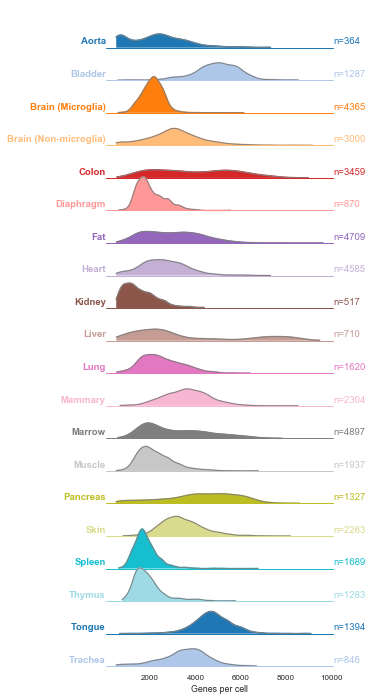

In [18]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')

for ax in g.axes.flatten():
#     # Add white gridlines
#     xticks = ax.get_xticks()
#     xmin, xmax, ymin, ymax = ax.axis()
#     ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
#     ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)

g.savefig(f'{figure1_folder}/horizonplot_genes_per_cell.pdf')